In [1]:
import sys
import datetime as dt
import pandas as pd
import pprint

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

from jeffutils.utils import reimport

sys.path.append('../')
from experimenter import *
reimport(["from experimenter import *"], globals())

# Load Data

In [12]:
# load cancer dataset from sklearn
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

# split data
test_size = 0.2
train_size = 1 - test_size
random_state = 42
n_classes = len(set(y))
first_size = 20
count = 0
print("Shuffling:", end=" ")
while True:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, shuffle=True)
    if len(set(y_train[:first_size])) >= n_classes-1 and len(set(y_test[:first_size])) >= n_classes-1:
        break
    count += 1
    print(count, end=", ")
print(f"\nTrain set has {len(set(y_train))} classes and test set has {len(set(y_test))} classes")

# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X shape: ", X_train.shape)
print("y shape: ", y_train.shape)

# remember to do any preprocessing necessary for the data

Shuffling: 
Train set has 2 classes and test set has 2 classes
X shape:  (455, 30)
y shape:  (455,)


## Global Variables

In [3]:
# customize based on training data
dataset_name = "cancer"
data_sizes = [first_size, 50, 100, 200, 455]
datetime = dt.datetime.now().strftime(date_format)
experiment_info = (dataset_name, data_sizes, X_train, y_train, X_test, y_test)
constants = (data_sizes, datetime, dataset_name)
pp = pprint.PrettyPrinter(indent=4)

# Model Training

In [4]:
# RANDOM FOREST
new_set = False
if new_set:
    datetime = dt.datetime.now().strftime(date_format)
model_name = 'randomforest'

rfr_results = benchmark_ml(model_name, experiment_info, datetime)
benchmarking.update(rfr_results)

Benchmarking randomforest: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]


In [5]:
# K NEAREST NEIGHBORS
new_set = False
if new_set:
    datetime = dt.datetime.now().strftime(date_format)
model_name = 'knn'

knn_results = benchmark_ml(model_name, experiment_info, datetime, repeat=1)
benchmarking.update(knn_results)

Benchmarking knn: 100%|██████████| 25/25 [00:00<00:00, 49.28it/s]


In [6]:
# CONVOLUTIONAL NEURAL NETWORK
new_set = False
if new_set:
    datetime = dt.datetime.now().strftime(date_format)
model_name = 'cnn'

In [7]:
# METRIC LEARNING
new_set = False
if new_set:
    datetime = dt.datetime.now().strftime(date_format)
model_name = 'metric'

metric_results = benchmark_ml(model_name, experiment_info, datetime, repeat=1)
benchmarking.update(metric_results)

Benchmarking metric: 100%|██████████| 25/25 [01:06<00:00,  2.66s/it]


In [8]:
# OUR MODEL
new_set = False
if new_set:
    datetime = dt.datetime.now().strftime(date_format)
model_name = 'ours'

# our_results = benchmark_ml(model_name, experiment_info, datetime)
# benchmarking.update(our_results)

# Model Evaluation

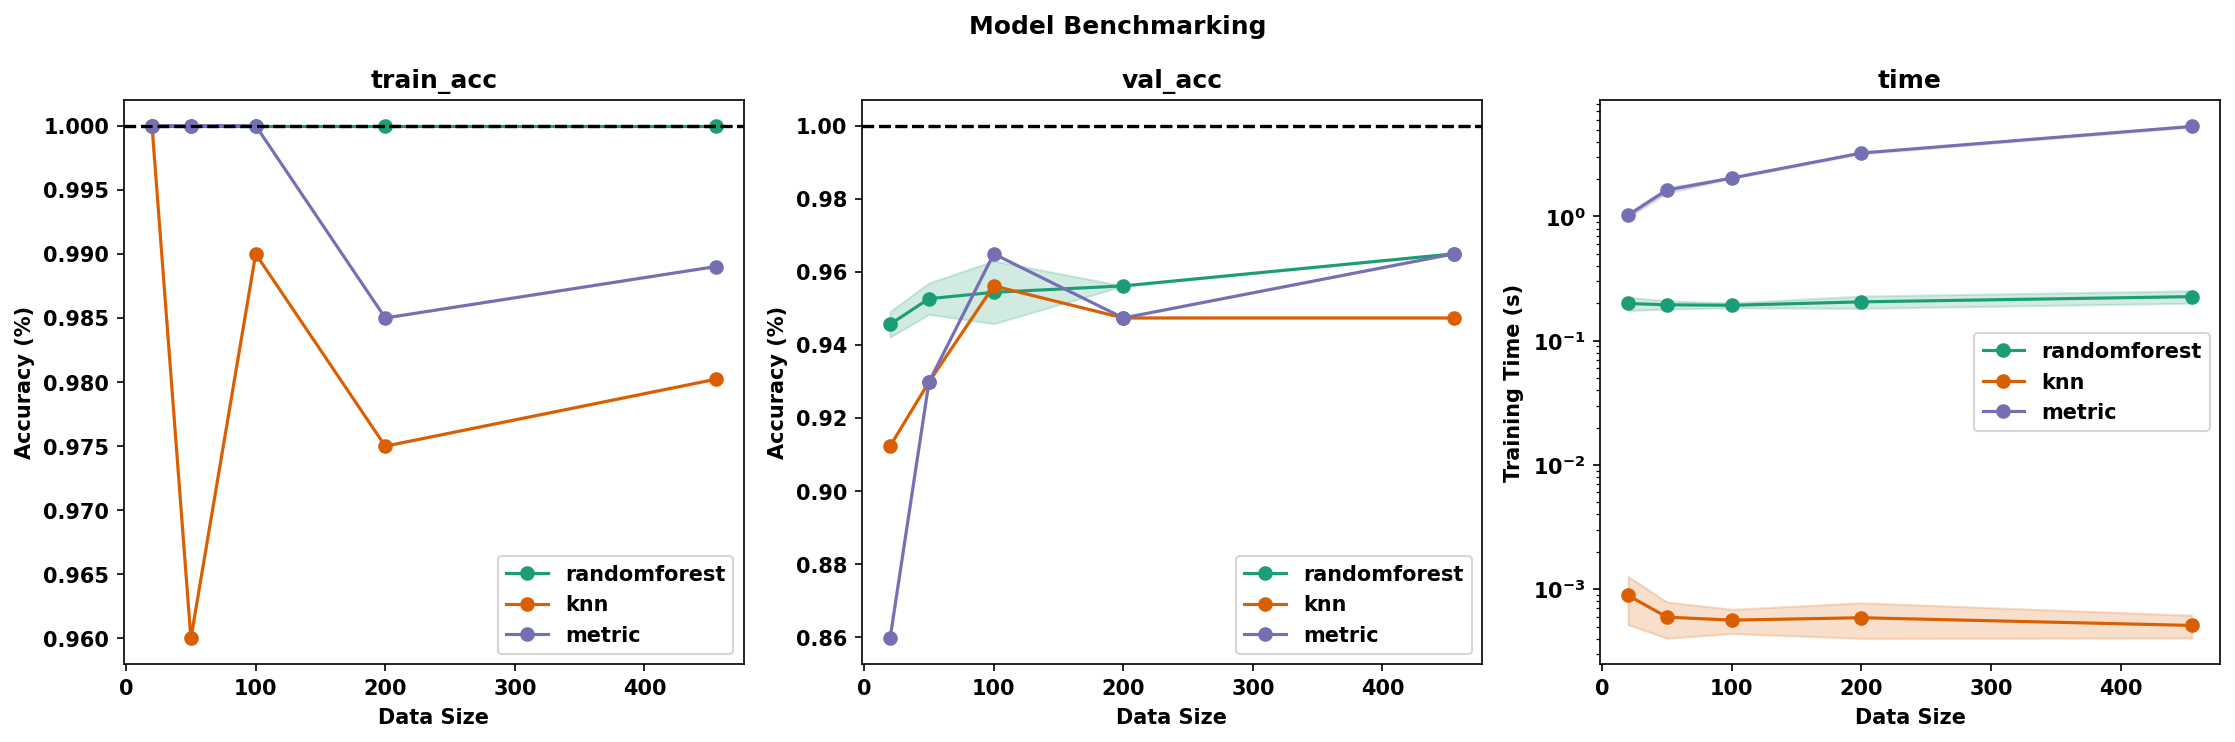

In [9]:
plot_results(benchmarking, constants, 
             save_fig=True, replace_fig=True, from_data=False)

In [10]:
# pretty print the benchmarking results
pp.pprint(benchmarking)

{   'knn': {   0: {   'time': array([0.0007667, 0.0005092, 0.0007544, 0.0005123, 0.0004314]),
                      'train_acc': array([1.        , 0.96      , 0.99      , 0.975     , 0.98021978]),
                      'val_acc': array([0.9122807 , 0.92982456, 0.95614035, 0.94736842, 0.94736842])},
               1: {   'time': array([0.0016321, 0.000468 , 0.0004183, 0.0004185, 0.000466 ]),
                      'train_acc': array([1.        , 0.96      , 0.99      , 0.975     , 0.98021978]),
                      'val_acc': array([0.9122807 , 0.92982456, 0.95614035, 0.94736842, 0.94736842])},
               2: {   'time': array([0.0006607, 0.0006585, 0.0005844, 0.000756 , 0.0004587]),
                      'train_acc': array([1.        , 0.96      , 0.99      , 0.975     , 0.98021978]),
                      'val_acc': array([0.9122807 , 0.92982456, 0.95614035, 0.94736842, 0.94736842])},
               3: {   'time': array([0.0006851, 0.0009417, 0.0004368, 0.0003937, 0.0004742]),
   

In [11]:
fig_path = f"results/{dataset_name}/charts/"
a = get_last_file(fig_path, "benchmarking_")
print(a)

results/cancer/charts/benchmarking__d400815@2028.npy
